In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/Users/seino/Documents/res/09_DeepLearning/img/With_Gingiva/Mix/32'
base_dir = '/Users/seino/Documents/res/09_DeepLearning/playground/teeth_recognition/dataset'

In [3]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
import random

all_list = os.listdir(original_dataset_dir)
if '.DS_Store' in all_list:
    all_list.remove('.DS_Store')
random.shuffle(all_list)

In [5]:
train_fn = all_list[:20000]

for fn in train_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(train_dir, fn)
    shutil.copyfile(src, dst)

In [6]:
validation_fn = all_list[20000:25000]

for fn in validation_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(validation_dir, fn)
    shutil.copyfile(src, dst)

In [7]:
test_fn = all_list[25000:30000]

for fn in test_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(test_dir, fn)
    shutil.copyfile(src, dst)

In [8]:
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [9]:
height = 32
width = 32
channels = 3
num_classes = 32

model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(height, width, channels)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 32)        128       
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 16, 16, 32)        1056      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
Total params: 3,296
Trainable params: 3,296
Non-trainable params: 0
_________________________________________________________________


In [10]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
X = []
train_list = os.listdir(train_dir)

for fn in train_list:
    dst = os.path.join(train_dir, fn)
    img = img_to_array(load_img(dst))
    X.append(img)
    

In [12]:
Y = []
def teeth_encode(file_name):
    dent = [
    11, 12, 13, 14, 15, 16, 17, 18,
    21, 22, 23, 24, 25, 26, 27, 28,
    31, 32, 33, 34, 35, 36, 37, 38,
    41, 42, 43, 44, 45, 46, 47, 48]
    encoded_dentition = [0]*32
    
    removed_fn = file_name.strip('[').strip('.png').strip(']')
    teeth_list = removed_fn.split(',')
    teeth_list = [int(k) for k in teeth_list]
    
    for each_teeth in teeth_list:
        if each_teeth in dent:
            p = dent.index(each_teeth)
            encoded_dentition[p] = 1
    return encoded_dentition

for fn in train_list:
    encoded_dentition = teeth_encode(fn)
    Y.insert(-1, encoded_dentition)

In [13]:
X = np.asarray(X)
Y = np.asarray(Y)

In [14]:
X = X.astype('float32')
X = X / 255.0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=111)

In [16]:
callbacks = [
    keras.callbacks.TensorBoard(
    log_dir = '/Users/seino/Documents/res/09_DeepLearning/playground/teeth_recognition/log_dir',
    histogram_freq=1,
    embeddings_freq=1)
]

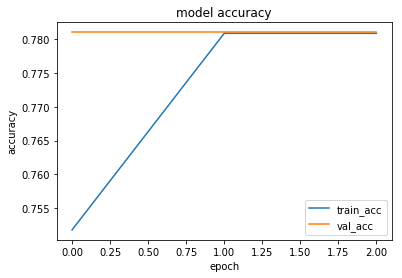

In [17]:
history = model.fit(X_train, y_train, batch_size=100, epochs=3, validation_data = (X_test, y_test), verbose = 0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()